In [11]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [12]:
sns.set_theme(style='darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [13]:
data = pd.read_csv('video_games_sales.csv')
data

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224682/indivisibl...,1,NaN,/games/boxart/full_6339426AmericaFrontccc.jpg
55788,55789,Lost Ember,lost-amber,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/games/game.php?id=2246...,1,NaN,/games/boxart/full_8893129AmericaFrontccc.jpg
55789,55790,Lost Ember,lost-amber,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224690/lost-ember...,1,NaN,/games/boxart/full_6514293AmericaFrontccc.jpg
55790,55791,Lost Ember,lost-amber,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224688/lost-ember...,1,NaN,/games/boxart/full_6799693AmericaFrontccc.jpg


График №1

Сделаем визуализацию средней оценки критиков по категориям игр.

<AxesSubplot:title={'center':'График оценок игр критиками по жанрам'}, xlabel='Жанр', ylabel='Оценка критиков'>

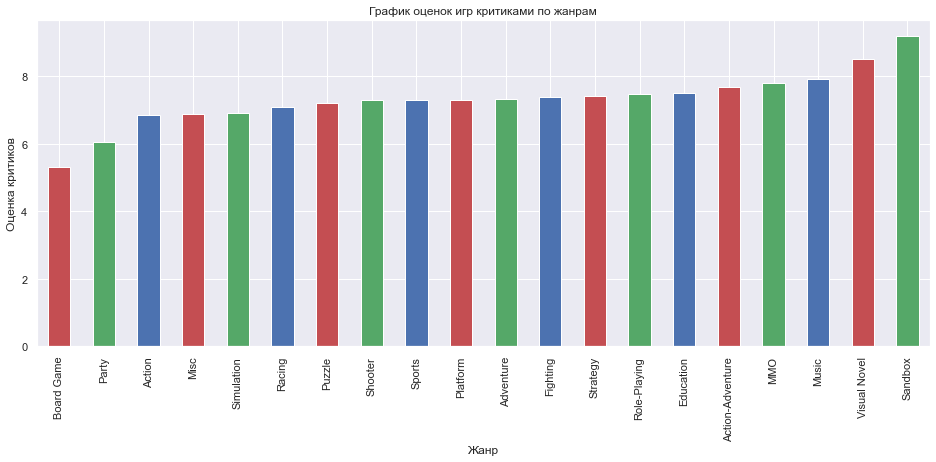

In [14]:
data.groupby('Genre')['Critic_Score'].mean().sort_values().plot(
    kind='bar', xlabel = 'Жанр', ylabel = 'Оценка критиков', title='График оценок игр критиками по жанрам', color=['r', 'g', 'b'], figsize=(16,6)
)

Из графика делаем вывод что критикам больше нравятся Песочницы и Визуальные новелы. Ниже всего они оценивают Настольные игры.

График №2

Так же сделаем boxplot средней оценки пользователей по жанрам.

Text(0.5, 1.0, 'Оценки пользователей по жанрам')

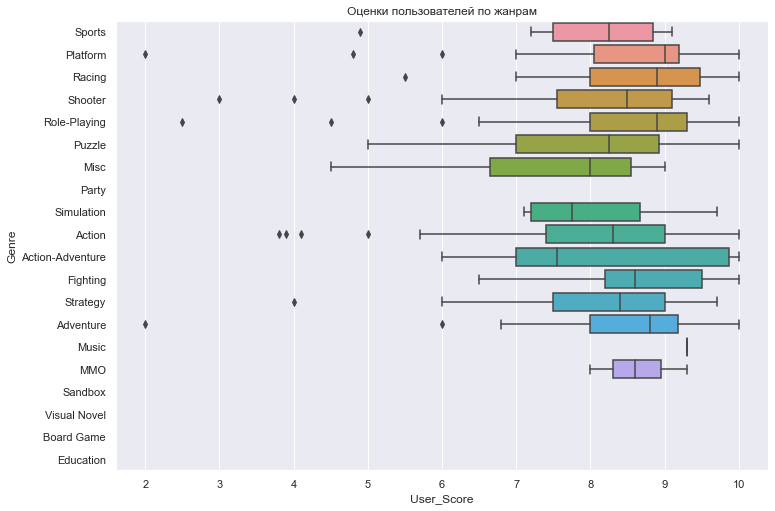

In [15]:
sns.boxplot(data=data, x='User_Score', y='Genre')
plt.title('Оценки пользователей по жанрам')

По данной визуализации понятно, что выбросов не так много. И расброс оценок не большой бля большинства жанров.

График №3

Text(0, 0.5, 'Количество игр')

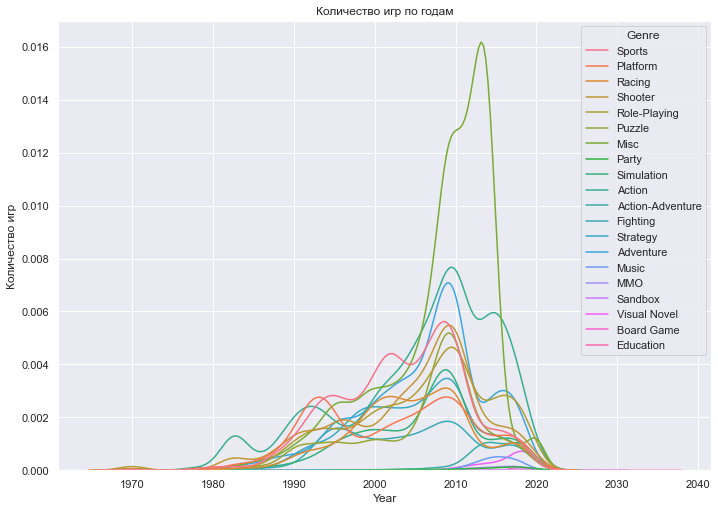

In [16]:
sns.kdeplot(
    data=data, x='Year',  hue='Genre'
)
plt.title('Количество игр по годам')
plt.ylabel('Количество игр')

Из этой визуализации видно, что в последнее время наибольший спрос к Ролевым играм

График №4

In [17]:
z = data.pivot_table(index='Genre', columns='ESRB_Rating', values='User_Score', aggfunc='mean')
z.head()

ESRB_Rating,E,E10,M,RP,T
Genre,,,,,
Action,6.950,5.9,8.312903,NaN,8.080000
Action-Adventure,6.400,9.1,NaN,NaN,7.300000
Adventure,9.325,9.0,8.400000,NaN,8.470000
Fighting,NaN,9.7,NaN,NaN,8.777778
MMO,NaN,NaN,NaN,NaN,8.650000


Text(0.5, 1.0, 'Оценки пользователей по жанрам')

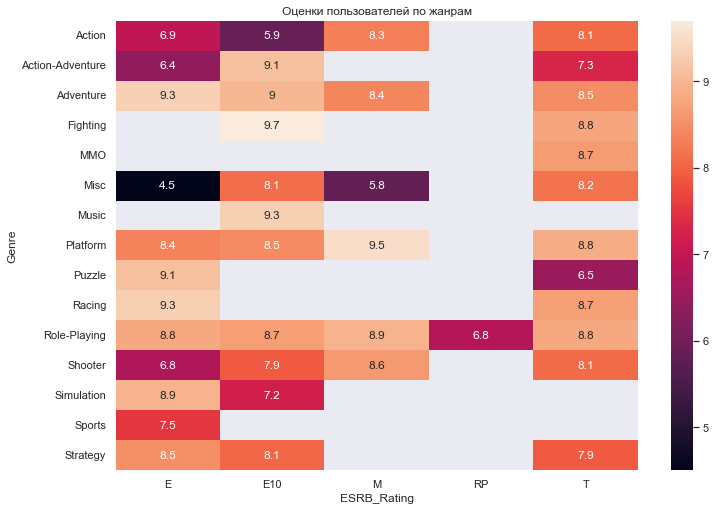

In [18]:
sns.heatmap(data=z, annot=True)
plt.title('Оценки пользователей по жанрам')

Из этой визуализации можно оценить в каком Жанре какой Рейтинг предпочтительнее у пользователей

График №5

Text(0.5, 1.0, 'Оценки критиков по жанрам')

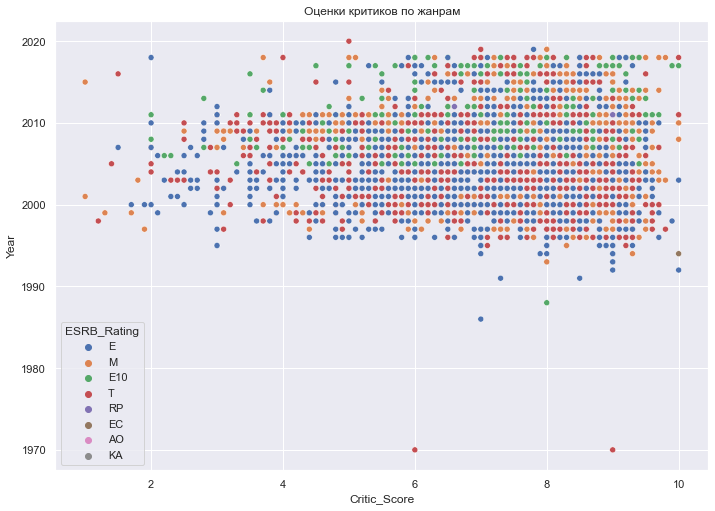

In [19]:
sns.scatterplot(data=data, x='Critic_Score', y='Year', hue='ESRB_Rating')
plt.title('Оценки критиков по жанрам')

По данной визуализации можно оценить Оценки Критиков по Жанрам

График №6

<AxesSubplot:title={'center':'Количество игр по годам'}, xlabel='Year', ylabel='Количество игр'>

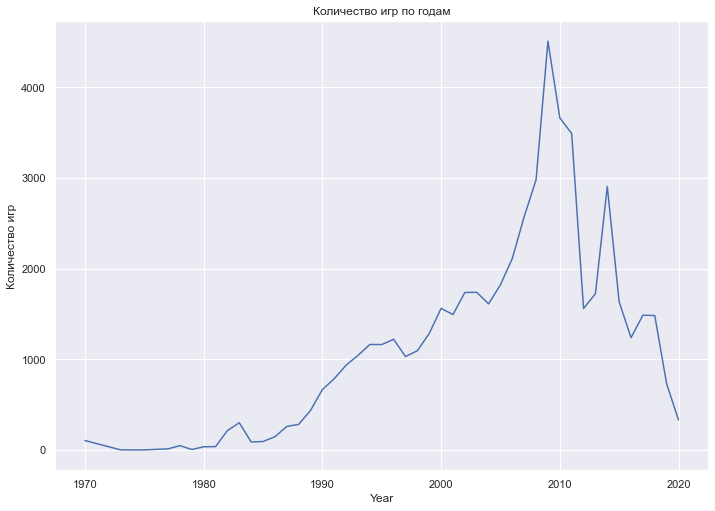

In [20]:
data.groupby('Year')['Year'].count().plot(ylabel='Количество игр', title='Количество игр по годам')

По данному графику можно сделать вывод, что самое большое количество игр было выпущено в нулевые.